Projet Logiciel DAC : Changement de comportement dans des traces utilisateurs
--------

### Statistiques sur les données des trajectoires

- calcul d'entropie spatiale

- calcul d'entropie temporelle

- combien de user, trajets (heures, kilomètres ,nombre , durée totale par utilisateur , recoupement des trajets utilisateurs ?

Lecture/importation des données 

In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt
import os

dico = dict()
for i in range(182):
    if((i>9) and (i<100)):
        if(os.path.exists('Geolife_Trajectories_1.3/Data/0'+ str(i) +'/Trajectory/')):
            dico['0'+str(i)] = os.listdir('Geolife_Trajectories_1.3/Data/0'+ str(i) +'/Trajectory/')
    elif(i<10):
        if(os.path.exists('Geolife_Trajectories_1.3/Data/00'+ str(i) +'/Trajectory/')):
            dico['00'+str(i)] = os.listdir('Geolife_Trajectories_1.3/Data/00'+ str(i) +'/Trajectory/')
    else:
        if(os.path.exists('Geolife_Trajectories_1.3/Data/'+ str(i) +'/Trajectory/')):
            dico[str(i)] = os.listdir('Geolife_Trajectories_1.3/Data/'+ str(i) +'/Trajectory/')
            
for i in dico.keys():
    dico[i].sort()
    

### Nombre de fichiers dans la base

In [2]:
d = 0
for i in dico.keys():
    for j in range(len(dico[i])):
        fichier = 'Geolife_Trajectories_1.3/Data/'+i+'/Trajectory/' + dico[i][j]
        #d.append(np.loadtxt(fichier, delimiter=",", skiprows=6 ,dtype='string'))
        d+=1
print('Nombre de fichiers dans la base = ' + str(d))
nbUser = len(dico)
print('Nombre \'utilisateurs : '+str(nbUser))

Nombre de fichiers dans la base = 18670
Nombre 'utilisateurs : 182


### Nombre de fichiers dans la base par utilisateurs

In [3]:
nbFicByUser = []
for i in dico.keys():
    nbFicByUser.append([i,len(dico[i])])
nbFicByUser.sort()
print(nbFicByUser)

[['000', 171], ['001', 71], ['002', 175], ['003', 322], ['004', 395], ['005', 86], ['006', 28], ['007', 54], ['008', 34], ['009', 49], ['010', 161], ['011', 201], ['012', 77], ['013', 144], ['014', 279], ['015', 67], ['016', 51], ['017', 391], ['018', 50], ['019', 84], ['020', 151], ['021', 8], ['022', 146], ['023', 34], ['024', 101], ['025', 757], ['026', 43], ['027', 5], ['028', 64], ['029', 45], ['030', 296], ['031', 6], ['032', 16], ['033', 13], ['034', 198], ['035', 74], ['036', 72], ['037', 148], ['038', 110], ['039', 227], ['040', 27], ['041', 557], ['042', 150], ['043', 43], ['044', 72], ['045', 9], ['046', 31], ['047', 12], ['048', 3], ['049', 1], ['050', 51], ['051', 51], ['052', 104], ['053', 9], ['054', 3], ['055', 24], ['056', 31], ['057', 22], ['058', 22], ['059', 8], ['060', 2], ['061', 20], ['062', 706], ['063', 15], ['064', 23], ['065', 137], ['066', 19], ['067', 120], ['068', 408], ['069', 8], ['070', 11], ['071', 73], ['072', 2], ['073', 112], ['074', 91], ['075', 13

In [4]:
def TraceByUser(User):
    #concatene toutes les traces (tous les fichiers) de l'uitlisateur en parametre
    UserL = np.array([])
    fichier = 'Geolife_Trajectories_1.3/Data/'+User+'/Trajectory/'
    cpt = 0
    for i in dico[User]:
        n = np.loadtxt(fichier+i, delimiter=",", skiprows=6 ,dtype='string')
        if(cpt==0):
            UserL = n
            cpt = 1
        else:
            UserL = np.vstack((UserL,n))
    return UserL

Concatenation de toutes les trajectoires !

In [5]:
UserL = []
cpt = 0
for i in dico.keys():
    fichier = 'Geolife_Trajectories_1.3/Data/'+i+'/Trajectory/'
    for j in dico[i]:
        n = np.loadtxt(fichier+j, delimiter=",", skiprows=6 ,dtype='str')
        UserL.append(n)
UserL = np.array(UserL)
UserL.shape

(18670,)

In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math

In [7]:
UserL

array([ array([['39.984702', '116.318417', '0', ..., '39744.1201851852',
        '2008-10-23', '02:53:04'],
       ['39.984683', '116.31845', '0', ..., '39744.1202546296',
        '2008-10-23', '02:53:10'],
       ['39.984686', '116.318417', '0', ..., '39744.1203125', '2008-10-23',
        '02:53:15'],
       ..., 
       ['40.009243', '116.32105', '0', ..., '39744.4659953704',
        '2008-10-23', '11:11:02'],
       ['40.009269', '116.320978', '0', ..., '39744.4660532407',
        '2008-10-23', '11:11:07'],
       ['40.009328', '116.320887', '0', ..., '39744.4661111111',
        '2008-10-23', '11:11:12']],
      dtype='<U16'),
       array([['40.008304', '116.319876', '0', ..., '39745.0902662037',
        '2008-10-24', '02:09:59'],
       ['40.008413', '116.319962', '0', ..., '39745.0903240741',
        '2008-10-24', '02:10:04'],
       ['40.007171', '116.319458', '0', ..., '39745.0903819444',
        '2008-10-24', '02:10:09'],
       ..., 
       ['40.009199', '116.321111', '0', ..

- Nombre de trajectoires au total ? égale au nombre de fichiers totale = 18670 (voir plus haut)

- Distance parcourut au total en kilometres ?

In [8]:
def get_distance_m(lat1, lng1, lat2, lng2):
    earth_radius = 6378137   # Terre = sphere de 6378km de rayon
    rlo1 = np.deg2rad(lng1)
    rla1 = np.deg2rad(lat1)
    rlo2 = np.deg2rad(lng2)
    rla2 = np.deg2rad(lat2)
    dlo = (rlo2 - rlo1)*1.0 / 2
    dla = (rla2 - rla1)*1.0 / 2
    a = (math.sin(dla) * math.sin(dla)) + math.cos(rla1) * math.cos(rla2) * (math.sin(dlo) * math.sin(dlo))
    d = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return (earth_radius * d)/1000

In [9]:
#40.714268,-74.005974
#48.856667,2.350987
get_distance_m(40.714268,-74.005974,48.856667,2.350987)/1000

5.843596206482095

In [10]:
dst = []
for i in range(UserL.shape[0]):
    trajectoire = UserL[i]
    f = trajectoire[0]
    l = trajectoire[-1]
    dst.append( get_distance_m(f[0].astype(np.float) , f[1].astype(np.float),\
                                l[0].astype(np.float),l[1].astype(np.float)) )
print('Distance parcourut au total : '+ str(sum(dst)) +' kilometres')

Distance parcourut au total : 407737.05299181194 kilometres


- Duree des trajectoires au total en heures?

In [11]:
duree = []
for i in range(UserL.shape[0]):
    trajectoire = UserL[i]
    f = trajectoire[0][4].astype(np.float)
    l = trajectoire[-1][4].astype(np.float)
    duree.append((l-f)*24)
print('Duree des trajectoires au total : '+ str(sum(duree)) +' heures')

Duree des trajectoires au total : 50176.7766665 heures


- Faire un camenbert de la distribution des distances parcourut dans les trajectoires 

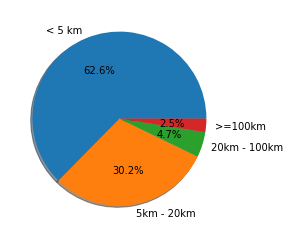

In [12]:
dst = np.array(dst)
Inf5km = np.where(dst<5)[0].shape[0]
FiveKmTwentyKm = np.where(dst[np.where(dst>=5)[0]]<20)[0].shape[0]
TwentyKmHundredKm = np.where(dst[np.where(dst>=20)[0]]<100)[0].shape[0]
HundredKmPlus = np.where(dst>=100)[0].shape[0]

labels = ['< 5 km','5km - 20km','20km - 100km','>=100km']
count = [Inf5km*1.0/nbUser,FiveKmTwentyKm*1.0/nbUser,TwentyKmHundredKm*1.0/nbUser,HundredKmPlus*1.0/nbUser]

the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(count, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show() 

- Faire un camenbert de la distribution des durees des trajectoires 

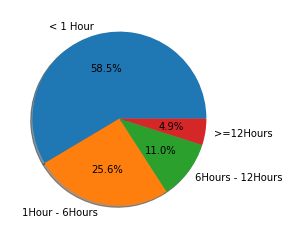

In [13]:
duree = np.array(duree)
InfOneHour = np.where(duree<1)[0].shape[0]
OneHourSixHour = np.where(duree[np.where(duree>=1)[0]]<6)[0].shape[0]
SixHourTwelveHour = np.where(duree[np.where(duree>=6)[0]]<12)[0].shape[0]
twelveHourPlus = np.where(duree>=12)[0].shape[0]

labels = ['< 1 Hour','1Hour - 6Hours','6Hours - 12Hours','>=12Hours']
count = [InfOneHour*1.0/nbUser,OneHourSixHour*1.0/nbUser,SixHourTwelveHour*1.0/nbUser,twelveHourPlus*1.0/nbUser]

the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(count, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show() 


- Faire un camenbert de la distribution de la periode de collection des trajectoires par utilisateur 

In [14]:
FLN = []
for i in dico.keys():
    if(len(dico[i])>1):
        FLN.append([i ,[dico[i][0],dico[i][-1]] ])
    else:
        FLN.append([i,[dico[i][0]]])
FLN
periode = []
for i in range(len(FLN)):
    User = FLN[i][0]
    if(len(FLN[i][1])>1):
        f = FLN[i][1][0]
        l = FLN[i][1][1]
        fichier = 'Geolife_Trajectories_1.3/Data/'+User+'/Trajectory/'
        first = np.loadtxt(fichier+f, delimiter=",", skiprows=6 ,dtype='str')
        last = np.loadtxt(fichier+l, delimiter=",", skiprows=6 ,dtype='str')
        ff = first[0][4].astype(np.float)
        ll = last[-1][4].astype(np.float)
        
        periode.append(ll-ff)
    else:
        f = FLN[i][1][0]
        fichier = 'Geolife_Trajectories_1.3/Data/'+User+'/Trajectory/'
        first = np.loadtxt(fichier+f, delimiter=",", skiprows=6 ,dtype='str')
        ff = first[0][4].astype(np.float)
        ll = first[-1][4].astype(np.float)
        periode.append(ll-ff)

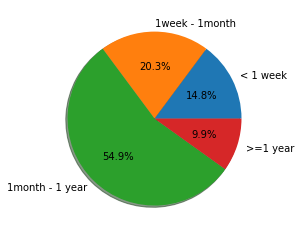

In [15]:
periode = np.array(periode)
OneWeek = np.where(periode<7)[0].shape[0]
OneWeekOneMonth = np.where(periode[np.where(periode>=7)[0]]<30)[0].shape[0]
OneMonthOneYear = np.where(periode[np.where(periode>=30)[0]]<365)[0].shape[0]
OneYearP = np.where(periode>=365)[0].shape[0]

labels = ['< 1 week','1week - 1month','1month - 1 year','>=1 year']
count = [OneWeek*1.0/nbUser,OneWeekOneMonth*1.0/nbUser,OneMonthOneYear*1.0/nbUser,OneYearP*1.0/nbUser]

the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(count, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show() 

- Faire un camenbert de la distribution du nombres de trajectoires par utilisateurs

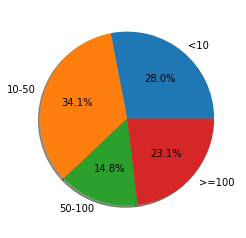

In [19]:
nbFicByUser = np.array(nbFicByUser)
nbFicUser = nbFicByUser[:,1].astype(np.int)
inf10 = np.where(nbFicUser<10)[0].shape[0]
betw10_15 = np.where(nbFicUser[np.where(nbFicUser>=10)[0]]<50)[0].shape[0]
betw50_100 = np.where(nbFicUser[np.where(nbFicUser>=50)[0]]<100)[0].shape[0]
supE100 = np.where(nbFicUser>=100)[0].shape[0]

labels = ['<10','10-50','50-100','>=100']
count = [inf10*1.0/nbUser,betw10_15*1.0/nbUser,betw50_100*1.0/nbUser,supE100*1.0/nbUser]

the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(count, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show() 

## Statistiques sur le Fichier labels

- mode transport
- duree
- distance
...

### Nombre d'utilisateurs avec le fichiers labels (decrit le mode transport)

In [16]:
nb = 0
labels = []
for i in dico.keys():
    if('labels.txt' in os.listdir('Geolife_Trajectories_1.3/Data/'+ i )):
        labels.append(i)
        nb += 1
print('Nombre User avec labels : '+str(nb))
print('Nombre User sans labels : '+str(nbUser-nb))

Nombre User avec labels : 69
Nombre User sans labels : 113


In [17]:
transport = []
for i in labels:
    fichier = 'Geolife_Trajectories_1.3/Data/'+i+'/labels.txt'
    n = np.loadtxt(fichier, delimiter="\t", skiprows=1 ,dtype='str')
    transport.append(n)
transport = np.array(transport)
transport.shape

(69,)

**Mode de transport possible dans la base**

In [22]:
s = []
for i in range(transport.shape[0]):
    a = transport[i]
    if(len(a.shape)>1):
        s.extend(np.unique(a[:,-1]).tolist())
    else:
        s.append(a[-1])
        
np.unique(s)

array(['airplane', 'bike', 'boat', 'bus', 'car', 'motorcycle', 'run',
       'subway', 'taxi', 'train', 'walk'],
      dtype='<U10')

In [18]:
import datetime
def TimeByUser(lab):
    if(len(lab.shape)>1):
        res = 0
        for i in range(lab.shape[0]):
            nup = lab[i]
            last =  nup[1][:10]+'-'+nup[1][11:20]
            first = nup[0][:10]+'-'+nup[0][11:20]
            diff = datetime.datetime.strptime(last, '%Y/%m/%d-%H:%M:%S') - \
                    datetime.datetime.strptime(first, '%Y/%m/%d-%H:%M:%S')
            res += diff.total_seconds()
    else:
        last =  lab[1][:10]+'-'+lab[1][11:20]
        first = lab[0][:10]+'-'+lab[0][11:20]
        diff = datetime.datetime.strptime(last, '%Y/%m/%d-%H:%M:%S') - \
                datetime.datetime.strptime(first, '%Y/%m/%d-%H:%M:%S')
        res = diff.total_seconds()
    return res

In [59]:
duree2 = []
for i in range(transport.shape[0]):
    lab = transport[i]
    dure =  TimeByUser(lab)
    duree2.append(dure*1.0/(60*60))
print('Duree des trajectoires au total : '+ str(sum(duree2)) +' heures')

Duree des trajectoires au total : 12953.207500000006 heures


In [61]:
#dst2 = []
#for i in range(transport.shape[0]):
#    lab = transport[i]
#    f = transport[0]
#    l = transport[-1]
#    dst2.append( get_distance_m(f[0].astype(np.float) , f[1].astype(np.float),\
#                                l[0].astype(np.float),l[1].astype(np.float))/1000 )
print("Trouver un moyen d'acceder au points gps pour calculer la distance")   
print('Distance parcourut au total : '+ str(sum(dst2)) +' kilometres')

Trouver un moyen d'acceder au points gps pour calculer la distance
Distance parcourut au total : 0 kilometres


## Entropie spatiale

In [59]:
Ut = np.array([])
cpt = 0
liste_temps = []
gps_points = []
for i in range(UserL.shape[0]):
    liste_temps.extend(UserL[i][:,4].tolist())
    gps_points.extend(UserL[i][:,:2].tolist())

print(len(liste_temps))
gps_points = np.array(gps_points)
print(gps_points.shape)

24876978
(24876978, 2)


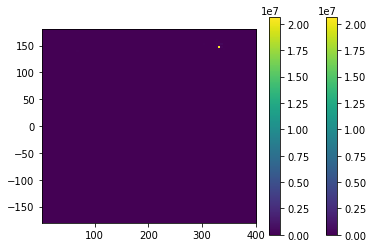

In [72]:
xmin,xmax = gps_points[:,0].astype(np.float).min(),gps_points[:,0].astype(np.float).max()
ymin,ymax = gps_points[:,1].astype(np.float).min(),gps_points[:,1].astype(np.float).max()
a= plt.hist2d(gps_points[:,1].astype(np.float),gps_points[:,0].astype(np.float),bins=100)[0]
plt.imshow(a, extent=[xmin,xmax,ymin,ymax],interpolation='nearest')
plt.colorbar()
plt.show()

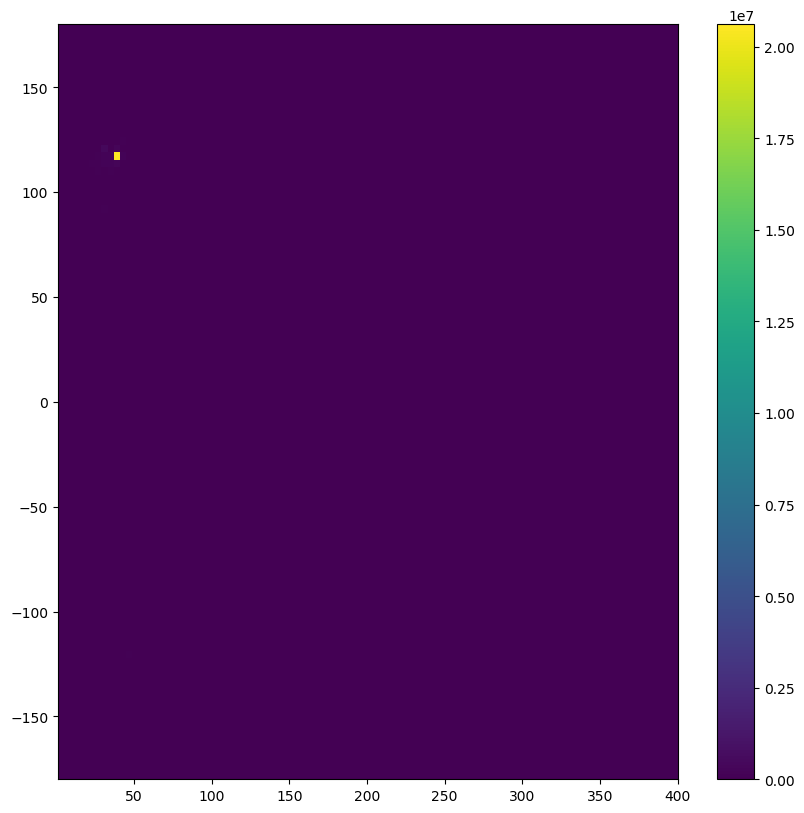

In [70]:
plt.figure(figsize=(10,10),dpi=100)
#xmin,xmax = UserL[:,0].astype(np.float).min(),UserL[:,0].astype(np.float).max()
#ymin,ymax = UserL[:,1].astype(np.float).min(),UserL[:,1].astype(np.float).max()
plt.hist2d(gps_points[:,1].astype(np.float),gps_points[:,0].astype(np.float),bins=100)
plt.colorbar()
plt.show()

In [81]:
somme = 0
d = plt.hist2d(gps_points[:,1].astype(np.float),gps_points[:,0].astype(np.float),bins=100)[0]
d = d[:,:]/len(gps_points)
#d = np.array(list(Counter(liste_temps).values()))/len(liste_temps)
for i in range(len(d)):
    for j in range(len(d[i])):
        if (d[i][j]==0):
            somme+=0
        else:
            somme += d[i][j]*np.log2(d[i][j])
somme *= -1
somme

1.0507004225534549e-06

In [78]:
1.1737760108965004e-05/2

5.868880054482502e-06

## Entropie temporelle

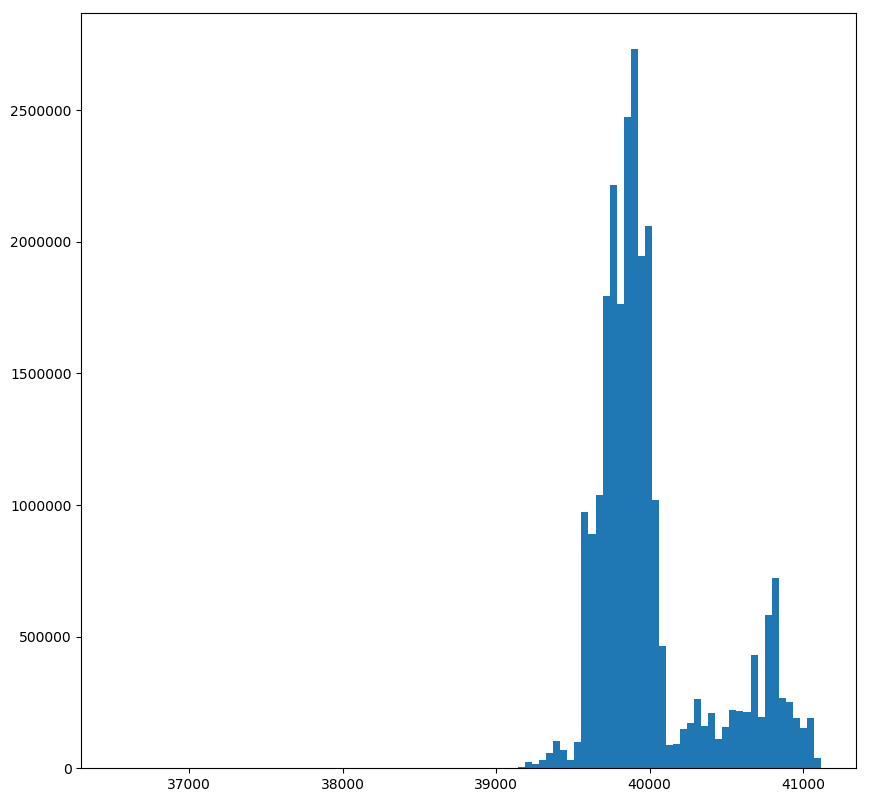

In [65]:
plt.figure(figsize=(10,10),dpi=100)
plt.hist(np.array(liste_temps).astype(np.float),bins=100)
plt.show()

In [49]:
from collections import Counter
def p_log_p(freq):
    """ fonction pour calculer \sum p_i log(p_i) """
    return np.nan_to_num(np.sum(freq*np.log2(freq)))

def entropy(y):
    """ calcul de l'entropie d'un ensemble"""
    ylen = float(y.size)
    if ylen <= 1:
        return 0
    freq = np.array(list(Counter(y).values()))/ylen
    return -p_log_p(freq)
entropy(np.array(liste_temps))

23.932693933539287

In [53]:
somme = 0
d = plt.hist(np.array(liste_temps).astype(np.float),bins=100,density='True')[0]
#d = np.array(list(Counter(liste_temps).values()))/len(liste_temps)
for i in range(len(d)):
    if (d[i]==0):
        somme+=0
    else:
        somme += d[i]*np.log2(d[i])
somme *= -1

In [55]:
somme

0.21691568504212799

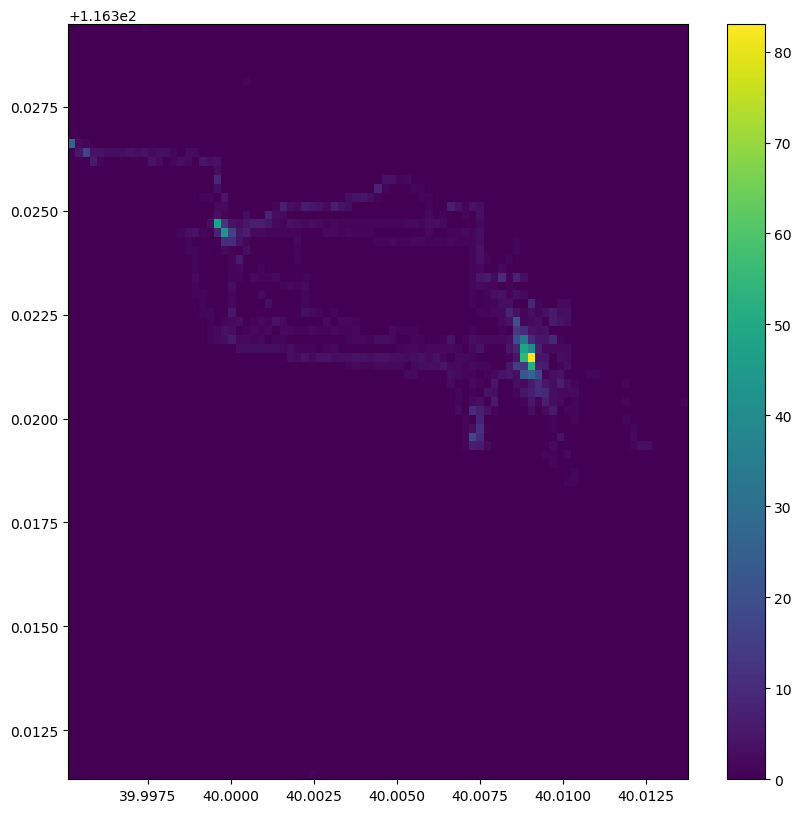

In [117]:
t = []
for tab in UserL[[11,14,15,16,18,19]]:
    t.extend(tab[:,:2].tolist())

plt.figure(figsize=(10,10),dpi=100)
plt.hist2d(np.array(t)[:,1].astype(np.float),np.array(t)[:,0].astype(np.float),bins=85)
plt.colorbar()
plt.show()

In [119]:
plt.hist2d(np.array(t)[:,1].astype(np.float),np.array(t)[:,0].astype(np.float),bins=85)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([ 39.9951    ,  39.99531976,  39.99553953,  39.99575929,
         39.99597906,  39.99619882,  39.99641859,  39.99663835,
         39.99685812,  39.99707788,  39.99729765,  39.99751741,
         39.99773718,  39.99795694,  39.99817671,  39.99839647,
         39.99861624,  39.998836  ,  39.99905576,  39.99927553,
         39.99949529,  39.99971506,  39.99993482,  40.00015459,
         40.00037435,  40.00059412,  40.00081388,  40.00103365,
         40.00125341,  40.00147318,  40.00169294,  40.00191271,
         40.00213247,  40.00235224,  40.002572  ,  40.00279176,
         40.00301153,  40.00323129,  40.00345106,  40.00367082,
         40.00389059,  40.00411035,  40.00433012,  40.00454988,
         4

In [120]:
np.unique(plt.hist2d(np.array(t)[:,1].astype(np.float),np.array(t)[:,0].astype(np.float),bins=85)[0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  20.,  21.,  22.,
        26.,  28.,  32.,  40.,  43.,  48.,  52.,  55.,  83.])

In [121]:
np.where(plt.hist2d(np.array(t)[:,1].astype(np.float),np.array(t)[:,0].astype(np.float),bins=85)[0]==83)

(array([63]), array([47]))

In [122]:
plt.hist2d(np.array(t)[:,1].astype(np.float),np.array(t)[:,0].astype(np.float),bins=85)[1][63]

40.008945176470583

In [123]:
plt.hist2d(np.array(t)[:,1].astype(np.float),np.array(t)[:,0].astype(np.float),bins=85)[2][47]

116.3213643882353

LIEU IMPORTANT : 40.008945176470583,116.3213643882353 (A PEU PRES CAR DISCRETISE)

In [132]:
lieu_important = []
a = plt.hist2d(np.array(t)[:,1].astype(np.float),np.array(t)[:,0].astype(np.float),bins=85)
for i in np.unique(a[0]):
    if (i>=(np.unique(a[0]).max()/2)-3):
        lieu_important.append([a[1][np.where(a[0]==i)[0][0]],a[2][np.where(a[0]==i)[0][0]]])
lieu_important

[[40.008945176470583, 116.32478443529412],
 [39.999715058823526, 116.3158068117647],
 [39.999495294117644, 116.31559305882352],
 [40.008945176470583, 116.32478443529412],
 [40.008725411764701, 116.32457068235294],
 [40.008945176470583, 116.32478443529412]]